In [40]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import sklearn

In [41]:
# loading the dataset using pandas 
data = pd.read_csv('creditcard.csv')

In [42]:
a = np.array([[1,2,3],[0,0,0]])
print(a)

[[1 2 3]
 [0 0 0]]


In [43]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [44]:
print(data.shape)

(284807, 31)


In [45]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [46]:
data = data.sample(frac = 1, random_state = 1)
print(data.shape)

(284807, 31)


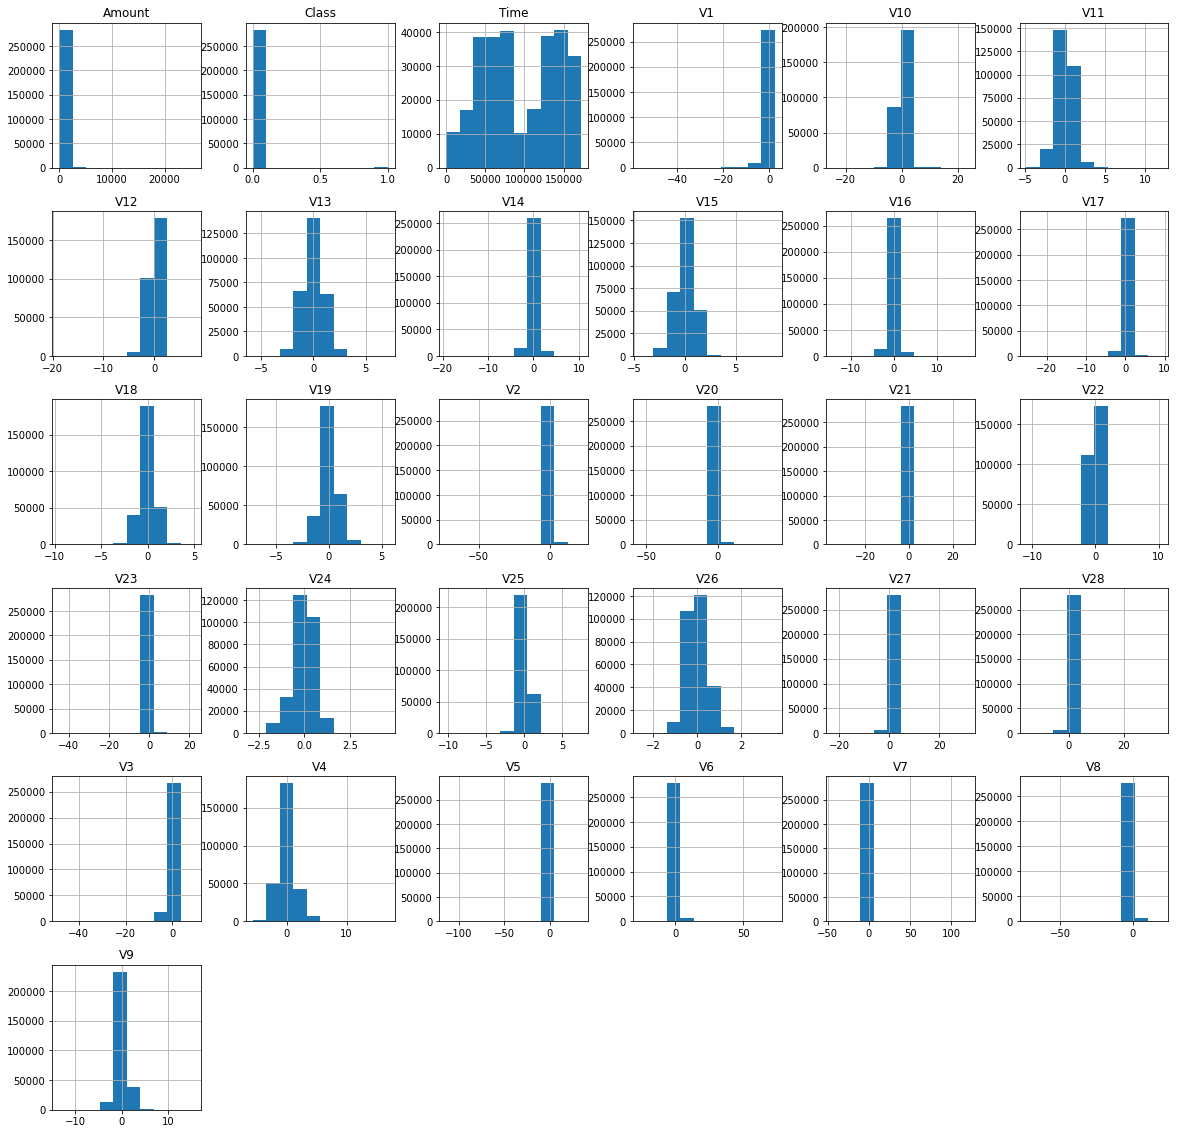

In [47]:
# plot a histogram 
data.hist(figsize = (20,20))
plt.show()

In [48]:
# determining the number of fraud cases

fraud = data[data['Class']==1]
valid = data[data['Class']==0]

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

Fraud cases: 492
Valid cases: 284315


In [49]:
#The Fraud transactions
print(fraud)

            Time         V1        V2         V3        V4        V5  \
235644  148479.0  -1.541678  3.846800  -7.604114  3.121459 -1.254924   
254344  156685.0  -0.129778  0.141547  -0.894702 -0.457662  0.810608   
192529  129741.0  -1.396204  2.618584  -6.036770  3.552454  1.030091   
176049  122608.0  -2.003460 -7.159042  -4.050976  1.309580 -2.058102   
42769    41237.0 -10.281784  6.302385 -13.271718  8.925115 -9.975578   
...          ...        ...       ...        ...       ...       ...   
149522   91407.0  -3.951209  2.881805  -6.421490  2.434181 -1.327325   
261925  160243.0  -2.783865  1.596824  -2.084844  2.512986 -1.446749   
40525    40276.0   1.159373  2.844795  -4.050680  4.777701  2.948980   
50211    44393.0  -4.617461  3.663395  -5.297446  3.880960 -3.263551   
108708   71033.0  -3.170818  0.185735  -3.399852  3.761155 -2.148047   

              V6         V7        V8        V9  ...       V21       V22  \
235644 -2.084875  -2.385027  1.471140 -2.530507  ...  1.096

In [19]:
#the Valid cases
print(valid)

            Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   
...          ...       ...       ...       ...       ...       ...       ...   
2032      1574.0 -0.615776  0.654356  2.618793  0.857434 -0.487340  0.593957   
240932  150813.0 -3.517229  3.326821 -3.590262  0.674769 -0.679266 -0.469516   
3701      3169.0 -0.315540  1.054303  1.484711  1.138262  0.394713 -0.168883   
153365   98752.0 -3.580417  4.100916 -2.577720 -1.476718 -0.006201 -2.008418   
97365    66187.0  1.213349  0.227172 -0.886860  1.345683  2.254592  3.788565   

              V7        V8        V9  .

In [50]:
# to determine the outliers in the data 
outlier = len(fraud) / float(len(valid))
print(outlier)

0.0017304750013189597


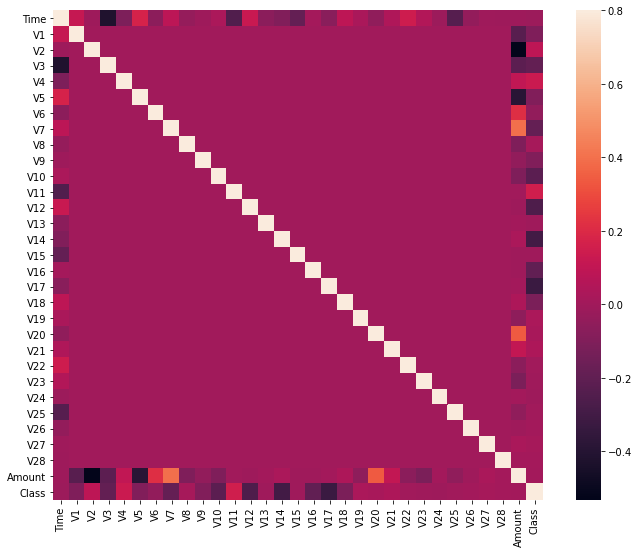

In [51]:
# Correlation matrix - to check for correlations
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [52]:
#To get the columns from dataframe
coloumns = data.columns.tolist()

#to filter data
columns = [c for c in coloumns if c not in ["Class"]]

#Store the predicting variable 
target = "Class"

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [53]:
#Isolation forest algorithm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#defining a random state
state= 1

#Outlier detection 
classifiers = {"Isolation forest": IsolationForest(max_samples=len(x), contamination=outlier, random_state=state),
               "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20 , contamination=outlier, novelty=True)}


In [54]:
#Fitting the model
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fitting the data and tag outliers
    if clf_name == "Local Outlier Factor ":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred  = clf.predict(x)
        
    #Reshaping the predictions values to 0 - valid and 1 - Fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    #classification metrics
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation forest:647
0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor:849
0.9970190339422837
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.06      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.53      0.52      0.53    284807
weighted avg       1.00      1.00      1.00    284807

